# Part I - Exploration of Loan Data from Prosper
## by Chikadibia F. Ezeh

## Introduction
> [Prosper System](https://www.lawinsider.com/dictionary/prosper-system) means the proprietary, internet-based peer-to-peer lending platform developed by the Member and transferred to the Company, through which Borrowers may obtain Borrower Loans and qualified investors may purchase Securities.

>[Loan Listing](https://www.lawinsider.com/dictionary/loan-listing) means a request by a Borrower to borrow money on the terms of a Loan through the Prosper System.

>This is a Loan Listing dataset which contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The exploration here will only be focused on select variables of the dataset, for the purpose of this project, focus shall be restricted to about 15 selected dataset columns/variables out of the 81 count. Brief description of these variables are given as thus;

>**ListingNumber**: The number that uniquely identifies the listing to the public as displayed on the website.

>**CreditScoreRangeLower**: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

>**ListingCategory**: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

>**CreditScoreRangeUpper**: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

>**BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.

>**EmploymentStatus**: The employment status of the borrower at the time they posted the listing.

>**AmountDelinquent**: Dollars delinquent at the time the credit profile was pulled.

>**DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

>**IncomeRange**: The income range of the borrower at the time the listing was created.

>**RevolvingCreditBalance**: Dollars of revolving credit at the time the credit profile was pulled.

>**AvailableBankcardCredit**: The total available credit via bank card at the time the credit profile was pulled.

>**OpenRevolvingMonthlyPayment**: Monthly payment on revolving accounts at the time the credit profile was pulled.

>**LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

>**CurrentCreditLines**: Number of current credit lines at the time the credit profile was pulled.

>**BankcardUtilization**: The percentage of available revolving credit that is utilized at the time the credit profile was pulled.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Download prosper loan dataset and save file 
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
df = pd.read_csv(url)
df.to_csv('prosper_loan.csv', index = False)

In [3]:
# load in downloaded loan data
loans = pd.read_csv('prosper_loan.csv')
loans.sample(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
63462,60B13389272143357CB0CDE,142843,2007-05-25 10:53:42.237000000,C,36,Chargedoff,2010-03-08 00:00:00,0.22121,0.2138,0.1838,...,-401.06,0.0,7157.81,7157.82,0.0,1.0,1,1,70.0,325
21397,9D583377074056333DCC3C3,80831,2007-01-03 12:32:38.743000000,NC,36,Completed,2007-09-05 00:00:00,0.24753,0.2400,0.1950,...,-11.43,0.0,0.00,0.00,0.0,1.0,0,0,0.0,36


In [4]:
# confirm dataset shape
loans.shape

(113937, 81)

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# make a copy of dataset to preserve the original
cp_loans=loans.copy()

In [7]:
# make a list of selected variables/columns from the dataset
select_variables = ['ListingNumber','ListingCategory (numeric)','CreditScoreRangeLower','CreditScoreRangeUpper','BorrowerAPR','EmploymentStatus',
                    'AmountDelinquent','DebtToIncomeRatio','IncomeRange','RevolvingCreditBalance','AvailableBankcardCredit',
                    'OpenRevolvingMonthlyPayment','LoanStatus','BankcardUtilization','CurrentCreditLines']

In [8]:
#make a dataframe from selected variables
select_df = cp_loans[select_variables]
select_df.sample(4)

,ListingNumber,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines
109775,915959,1,660.0,679.0,0.19988,Employed,0.0,0.06,"$100,000+",2894.0,106.0,126.0,Current,0.96,6.0
113268,117651,0,560.0,579.0,0.28040,Full-time,132.0,0.22,"$25,000-49,999",8882.0,1319.0,261.0,Completed,0.85,10.0
99382,1184507,1,740.0,759.0,0.08531,Employed,0.0,0.12,"$100,000+",17038.0,10031.0,434.0,Current,0.62,6.0
61236,15873,0,540.0,559.0,0.22744,NaN,NaN,0.16,Not displayed,NaN,NaN,0.0,Defaulted,NaN,NaN


In [9]:
len(select_variables)

15

In [10]:
# checking for null/missing values
select_df.isna().sum()

ListingNumber                     0
ListingCategory (numeric)         0
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
BorrowerAPR                      25
EmploymentStatus               2255
AmountDelinquent               7622
DebtToIncomeRatio              8554
IncomeRange                       0
RevolvingCreditBalance         7604
AvailableBankcardCredit        7544
OpenRevolvingMonthlyPayment       0
LoanStatus                        0
BankcardUtilization            7604
CurrentCreditLines             7604
dtype: int64

In [11]:
select_df = select_df.dropna()
select_df.isna().sum()

ListingNumber                  0
ListingCategory (numeric)      0
CreditScoreRangeLower          0
CreditScoreRangeUpper          0
BorrowerAPR                    0
EmploymentStatus               0
AmountDelinquent               0
DebtToIncomeRatio              0
IncomeRange                    0
RevolvingCreditBalance         0
AvailableBankcardCredit        0
OpenRevolvingMonthlyPayment    0
LoanStatus                     0
BankcardUtilization            0
CurrentCreditLines             0
dtype: int64

In [12]:
#Review selected dataframe info
select_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97903 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ListingNumber                97903 non-null  int64  
 1   ListingCategory (numeric)    97903 non-null  int64  
 2   CreditScoreRangeLower        97903 non-null  float64
 3   CreditScoreRangeUpper        97903 non-null  float64
 4   BorrowerAPR                  97903 non-null  float64
 5   EmploymentStatus             97903 non-null  object 
 6   AmountDelinquent             97903 non-null  float64
 7   DebtToIncomeRatio            97903 non-null  float64
 8   IncomeRange                  97903 non-null  object 
 9   RevolvingCreditBalance       97903 non-null  float64
 10  AvailableBankcardCredit      97903 non-null  float64
 11  OpenRevolvingMonthlyPayment  97903 non-null  float64
 12  LoanStatus                   97903 non-null  object 
 13  BankcardUtiliza

In [13]:
# change data types of columns as required
select_df= select_df.astype({'CreditScoreRangeLower':'int64','CreditScoreRangeUpper':'int64','ListingNumber':'object'})

In [14]:
# check data types for each column
select_df.dtypes

ListingNumber                   object
ListingCategory (numeric)        int64
CreditScoreRangeLower            int64
CreditScoreRangeUpper            int64
BorrowerAPR                    float64
EmploymentStatus                object
AmountDelinquent               float64
DebtToIncomeRatio              float64
IncomeRange                     object
RevolvingCreditBalance         float64
AvailableBankcardCredit        float64
OpenRevolvingMonthlyPayment    float64
LoanStatus                      object
BankcardUtilization            float64
CurrentCreditLines             float64
dtype: object

In [15]:
# create credit score range list from CreditScoreRangeLower and CreditScoreRangeUpper columnss
select_df['MedianScore'] = [int(np.median(np.arange(x,y+1))) for x,y in zip(select_df['CreditScoreRangeLower'],select_df['CreditScoreRangeUpper'])]
select_df.sample(2)

,ListingNumber,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore
31554,321823,4,540,559,0.37453,Full-time,0.0,0.05,"$25,000-49,999",850.0,0.0,42.0,Chargedoff,1.06,1.0,549
9004,1080005,1,680,699,0.15223,Employed,0.0,0.20,"$50,000-74,999",1761.0,10145.0,111.0,Current,0.06,6.0,689


In [16]:
# Apply FICO credit score ratings
#FICO_SCORE = {'Poor': [300,579],'Fair': [580,669],'Good': [670,739],'Very Good': [740,799],'Exceptional':[800,850]}
conditions = [
    (select_df['MedianScore']>=300) & (select_df['MedianScore']<580),
    (select_df['MedianScore']>=580) & (select_df['MedianScore']<670),
    (select_df['MedianScore']>=670) & (select_df['MedianScore']<740),
    (select_df['MedianScore']>=740) & (select_df['MedianScore']<800),
    (select_df['MedianScore']>=800) & (select_df['MedianScore']<851)
]
def outside_range(i):
    if i < 300:
        return 'Poor'
    elif i > 850:
        return 'Exceptional'
    return 'Error'
    
values = ['Poor','Fair','Good','Very Good','Exceptional']
select_df['CreditRating'] = np.select(conditions,values,default= select_df['MedianScore'].apply(outside_range))

select_df.head()

,ListingNumber,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating
0,193129,0,640,659,0.16516,Self-employed,472.0,0.17,"$25,000-49,999",0.0,1500.0,24.0,Completed,0.00,5.0,649,Fair
1,1209647,2,680,699,0.12016,Employed,0.0,0.18,"$50,000-74,999",3989.0,10266.0,389.0,Current,0.21,14.0,689,Good
3,658116,16,800,819,0.12528,Employed,10056.0,0.15,"$25,000-49,999",1444.0,30754.0,115.0,Current,0.04,5.0,809,Exceptional
4,909464,2,680,699,0.24614,Employed,0.0,0.26,"$100,000+",6193.0,695.0,220.0,Current,0.81,19.0,689,Good
5,1074836,1,740,759,0.15425,Employed,0.0,0.36,"$100,000+",62999.0,86509.0,1410.0,Current,0.39,21.0,749,Very Good


In [17]:
# create non numeric category column and drop the numeric category table
conditions = [
    (select_df['ListingCategory (numeric)']== 0), (select_df['ListingCategory (numeric)']== 1),
    (select_df['ListingCategory (numeric)']== 2), (select_df['ListingCategory (numeric)']== 3),
    (select_df['ListingCategory (numeric)']== 4), (select_df['ListingCategory (numeric)']== 5),
    (select_df['ListingCategory (numeric)']== 6), (select_df['ListingCategory (numeric)']== 7),
    (select_df['ListingCategory (numeric)']== 8), (select_df['ListingCategory (numeric)']== 9),
    (select_df['ListingCategory (numeric)']== 10), (select_df['ListingCategory (numeric)']== 11),
    (select_df['ListingCategory (numeric)']== 12), (select_df['ListingCategory (numeric)']== 13),
    (select_df['ListingCategory (numeric)']== 14), (select_df['ListingCategory (numeric)']== 15),
    (select_df['ListingCategory (numeric)']== 16), (select_df['ListingCategory (numeric)']== 17),
    (select_df['ListingCategory (numeric)']== 18), (select_df['ListingCategory (numeric)']== 19),
    (select_df['ListingCategory (numeric)']== 20)
]

values = ['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use',
          'Auto','Other','Baby and Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans',
          'Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation','Wedding Loans']
select_df['ListingCategory'] = np.select(conditions,values,default='Not in Category')

select_df.drop('ListingCategory (numeric)', axis =1, inplace = True)

select_df.head()

,ListingNumber,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
0,193129,640,659,0.16516,Self-employed,472.0,0.17,"$25,000-49,999",0.0,1500.0,24.0,Completed,0.00,5.0,649,Fair,Not Available
1,1209647,680,699,0.12016,Employed,0.0,0.18,"$50,000-74,999",3989.0,10266.0,389.0,Current,0.21,14.0,689,Good,Home Improvement
3,658116,800,819,0.12528,Employed,10056.0,0.15,"$25,000-49,999",1444.0,30754.0,115.0,Current,0.04,5.0,809,Exceptional,Motorcycle
4,909464,680,699,0.24614,Employed,0.0,0.26,"$100,000+",6193.0,695.0,220.0,Current,0.81,19.0,689,Good,Home Improvement
5,1074836,740,759,0.15425,Employed,0.0,0.36,"$100,000+",62999.0,86509.0,1410.0,Current,0.39,21.0,749,Very Good,Debt Consolidation


In [18]:
# Review descriptive statistics for dataset
select_df.describe()

,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,AmountDelinquent,DebtToIncomeRatio,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,BankcardUtilization,CurrentCreditLines,MedianScore
count,97903.000000,97903.000000,97903.000000,97903.000000,97903.000000,9.790300e+04,97903.000000,97903.000000,97903.000000,97903.000000,97903.000000
mean,690.370060,709.370060,0.217565,1003.242046,0.276037,1.730366e+04,10949.585559,409.758894,0.565739,10.383962,699.370060
std,56.743141,56.743141,0.080075,7154.343694,0.524521,3.198340e+04,19381.728405,437.843818,0.317582,5.457407,56.743141
min,520.000000,539.000000,0.006530,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,529.000000
25%,660.000000,679.000000,0.155380,0.000000,0.150000,3.159000e+03,845.500000,131.000000,0.310000,7.000000,669.000000
50%,680.000000,699.000000,0.207350,0.000000,0.220000,8.559000e+03,3990.000000,287.000000,0.610000,10.000000,689.000000
75%,720.000000,739.000000,0.280320,0.000000,0.320000,1.933600e+04,12785.500000,539.000000,0.840000,13.000000,729.000000
max,880.000000,899.000000,0.423950,463881.000000,10.010000,1.435667e+06,572427.000000,14985.000000,5.950000,59.000000,889.000000


In [19]:
select_df.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'], axis = 1, inplace=True)
select_df.head()

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
0,193129,0.16516,Self-employed,472.0,0.17,"$25,000-49,999",0.0,1500.0,24.0,Completed,0.00,5.0,649,Fair,Not Available
1,1209647,0.12016,Employed,0.0,0.18,"$50,000-74,999",3989.0,10266.0,389.0,Current,0.21,14.0,689,Good,Home Improvement
3,658116,0.12528,Employed,10056.0,0.15,"$25,000-49,999",1444.0,30754.0,115.0,Current,0.04,5.0,809,Exceptional,Motorcycle
4,909464,0.24614,Employed,0.0,0.26,"$100,000+",6193.0,695.0,220.0,Current,0.81,19.0,689,Good,Home Improvement
5,1074836,0.15425,Employed,0.0,0.36,"$100,000+",62999.0,86509.0,1410.0,Current,0.39,21.0,749,Very Good,Debt Consolidation


In [20]:
select_df.shape

(97903, 15)

### What is the structure of your dataset?

> The original dataset had the shape (113937, 81), i.e. 113,937 loans with 81 attributes (columns). preliminary data wrangling restricted the shape to (96187, 16), 16 selected attributes (columns) from the original dataset (among which includes both discrete and continuous variables), few of which were eventualy dropped and 3 attributes (MedianScore, CreditRating, listingcategory) are outcomes from feature engineering.

> Mean BorrowerAPR is 0.218123, mean DebtToIncomeRatio is 0.271943, and the mean MedianScore is 700.272625 with 'Good' credit rating.

### What is/are the main feature(s) of interest in your dataset?

> Quite a number of features in the dataset will affect the credit profile of the borrower and influence performance. The most stricking features, among others, for borrowers are the credit scores, debt to income ratios, credit ratings, income range while the ones for the loans are Revolving Credit Balances, Annual Percentage Rates (APR) and Bank Card Utilization percentage, e.t.c.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Loan status will show whether loan is completed, current, charged-off or non performing. Credit ratings and income ranges will show if customer can repay credit.

## Univariate Exploration




### QUESTIONS
> How distrubuted is borrowing accross:

>> 1. IncomeRange

>> 2. EmploymentStatus

>> 3. LoanStatus

>> 4. CreditRating

### VISUALIZATIONS

In [21]:
# create base color for plots
base_clolor = sns.color_palette()[0]

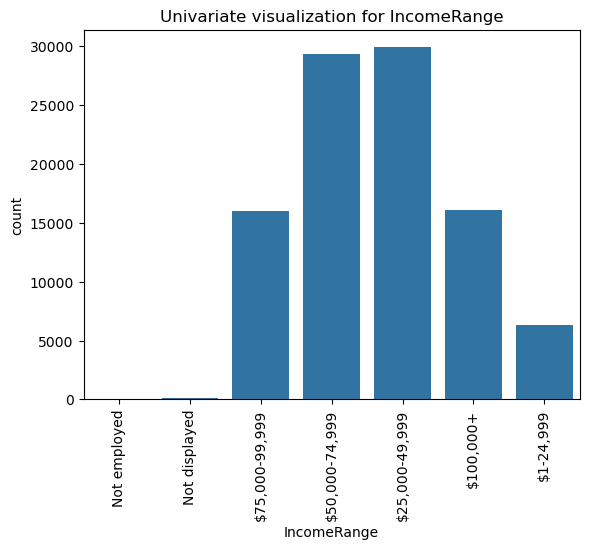

In [22]:
# Univariate visualization for IncomeRange
plot_order = select_df['IncomeRange'].value_counts().index.sort_values(ascending = False)
sns.countplot(data = select_df, x = 'IncomeRange', order = plot_order, color = base_clolor )
plt.xticks(rotation = 90)
plt.title('Univariate visualization for IncomeRange');

In [23]:
#describe income range
select_df['IncomeRange'].describe()

count              97903
unique                 7
top       $25,000-49,999
freq               29881
Name: IncomeRange, dtype: object

In [24]:
values = ['Not employed','Not displayed']
df = select_df[select_df['IncomeRange'].isin(values)]
df

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
66,122819,0.16802,Not employed,111.0,0.20,Not employed,1593.0,19407.0,16.0,Completed,0.07,4.0,629,Fair,Not Available
226,104542,0.11749,Full-time,0.0,10.01,Not displayed,152934.0,49014.0,2866.0,Completed,0.61,30.0,609,Fair,Not Available
694,116795,0.11749,Full-time,2190.0,0.09,Not displayed,0.0,325.0,10.0,Completed,0.00,6.0,749,Very Good,Not Available
1242,146341,0.11415,Not employed,0.0,10.01,Not employed,5932.0,22118.0,165.0,Completed,0.21,6.0,749,Very Good,Not Available
1925,139992,0.08684,Not employed,0.0,10.01,Not employed,2169.0,5882.0,80.0,Defaulted,0.10,9.0,749,Very Good,Not Available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113045,101305,0.09688,Full-time,0.0,0.17,Not displayed,9366.0,112734.0,286.0,Completed,0.07,14.0,809,Exceptional,Not Available
113391,118741,0.19981,Full-time,2249.0,0.27,Not displayed,11193.0,1133.0,442.0,Completed,0.89,13.0,609,Fair,Not Available
113474,127398,0.09567,Full-time,4.0,0.12,Not displayed,12062.0,41138.0,157.0,Completed,0.22,15.0,789,Very Good,Not Available
113692,250328,0.36623,Not employed,0.0,0.33,Not employed,2513.0,165.0,160.0,Chargedoff,1.02,15.0,589,Fair,Debt Consolidation


In [25]:
#get unique income ranges
df.LoanStatus.unique()

array(['Completed', 'Defaulted', 'Chargedoff'], dtype=object)

##### OBSERVATIONS 1
>The income range of borrowers for 215 loan lists were not correctly documented. They were documented as either 'Not employed' or 'Not displayed' and the loan status are either 'Completed', 'Defaulted', or 'Chargedoff'.

> 25,000 - 49,999 has the highest income range distribution, this is followed by 50,000 - 74,999 range.

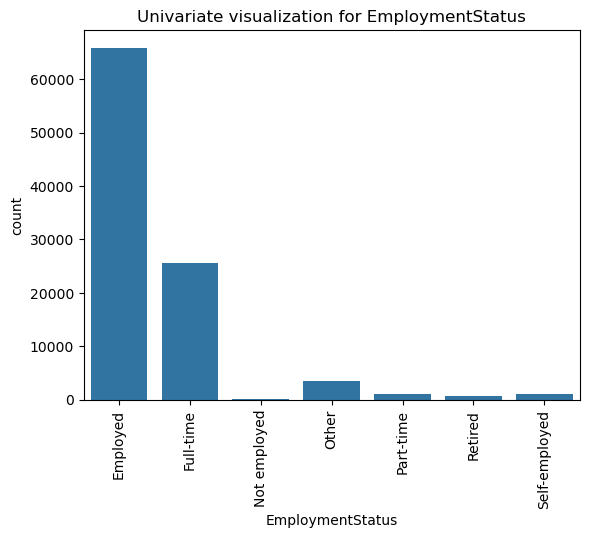

In [26]:
# Univariate visualization for EmploymentStatus
plot_order = select_df['EmploymentStatus'].value_counts().index.sort_values()
sns.countplot(data = select_df, x = 'EmploymentStatus', order = plot_order, color = base_clolor )
plt.xticks(rotation = 90)
plt.title('Univariate visualization for EmploymentStatus');

In [27]:
select_df['EmploymentStatus'].describe()

count        97903
unique           7
top       Employed
freq         65896
Name: EmploymentStatus, dtype: object

In [28]:
select_df.head()

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
0,193129,0.16516,Self-employed,472.0,0.17,"$25,000-49,999",0.0,1500.0,24.0,Completed,0.00,5.0,649,Fair,Not Available
1,1209647,0.12016,Employed,0.0,0.18,"$50,000-74,999",3989.0,10266.0,389.0,Current,0.21,14.0,689,Good,Home Improvement
3,658116,0.12528,Employed,10056.0,0.15,"$25,000-49,999",1444.0,30754.0,115.0,Current,0.04,5.0,809,Exceptional,Motorcycle
4,909464,0.24614,Employed,0.0,0.26,"$100,000+",6193.0,695.0,220.0,Current,0.81,19.0,689,Good,Home Improvement
5,1074836,0.15425,Employed,0.0,0.36,"$100,000+",62999.0,86509.0,1410.0,Current,0.39,21.0,749,Very Good,Debt Consolidation


In [29]:
# Transforming The employment status column
conditions = [
    (select_df['EmploymentStatus'] == 'Employed')|(select_df['EmploymentStatus'] == 'Full-time')|(select_df['EmploymentStatus'] == 'Part-time')|
    (select_df['EmploymentStatus'] == 'Self-employed'),
    (select_df['EmploymentStatus'] == 'Not employed'),
    (select_df['EmploymentStatus'] == 'Other'),
    (select_df['EmploymentStatus'] == 'Retired')
]
    

values = ['Employed', 'Not employed','Other','Retired']
select_df['EmploymentStatus'] = np.select(conditions, values, default = 'NA' )

select_df.head()

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
0,193129,0.16516,Employed,472.0,0.17,"$25,000-49,999",0.0,1500.0,24.0,Completed,0.00,5.0,649,Fair,Not Available
1,1209647,0.12016,Employed,0.0,0.18,"$50,000-74,999",3989.0,10266.0,389.0,Current,0.21,14.0,689,Good,Home Improvement
3,658116,0.12528,Employed,10056.0,0.15,"$25,000-49,999",1444.0,30754.0,115.0,Current,0.04,5.0,809,Exceptional,Motorcycle
4,909464,0.24614,Employed,0.0,0.26,"$100,000+",6193.0,695.0,220.0,Current,0.81,19.0,689,Good,Home Improvement
5,1074836,0.15425,Employed,0.0,0.36,"$100,000+",62999.0,86509.0,1410.0,Current,0.39,21.0,749,Very Good,Debt Consolidation


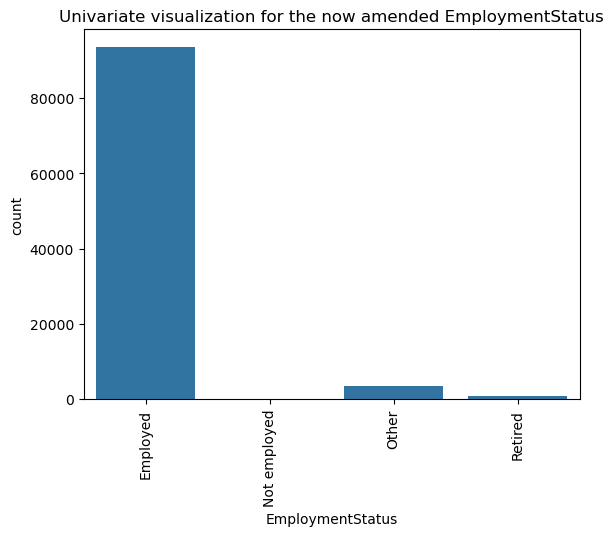

In [30]:
# Univariate visualization for the now amended EmploymentStatus
plot_order = select_df['EmploymentStatus'].value_counts().index.sort_values()
sns.countplot(data = select_df, x = 'EmploymentStatus', order = plot_order, color = base_clolor )
plt.xticks(rotation = 90)
plt.title('Univariate visualization for the now amended EmploymentStatus');

#### OBSERVATIONS 2
> Majority of the customers in the dataset are employed (Employed, Full-time, Self-employed, and part-time)

> The count of customers whose employment status are either 'Not available' or documented as 'Others' is quite significant

> There are few borrowers who are either 'Not employed' or 'Retired'

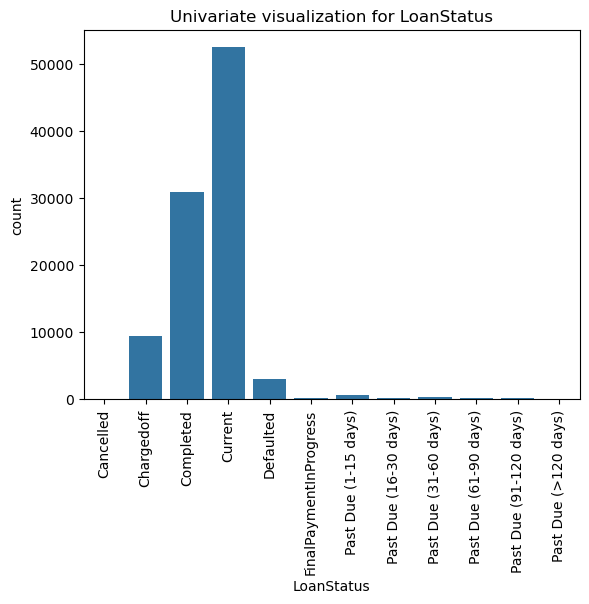

In [31]:
# Univariate visualization for LoanStatus
plot_order = select_df['LoanStatus'].value_counts().index.sort_values()
sns.countplot(data = select_df, x = 'LoanStatus', order = plot_order, color = base_clolor )
plt.xticks(rotation = 90)
plt.title('Univariate visualization for LoanStatus');

In [32]:
select_df['LoanStatus'].describe()

count       97903
unique         12
top       Current
freq        52478
Name: LoanStatus, dtype: object

#### OBSERVATIONS 3
> A larger count of the loans are 'Current' this is followed by the loans that have 'Completed' their tenor

> The count of 'Cancelled' loans is very insignificant

> There are significant counts of 'Chargedoff' and delinquent ('Defaulted and 'Past Due') loans probably due to poor performance

> Past Due loans were isolated by number of days past due



In [33]:
select_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)', 'Cancelled'],
      dtype=object)

In [34]:
# Transforming The loan status column
conditions = [
    (select_df['LoanStatus'] == 'Past Due (1-15 days)')|(select_df['LoanStatus'] == 'Defaulted')|(select_df['LoanStatus'] == 'Past Due (16-30 days)')|
    (select_df['LoanStatus'] == 'Past Due (31-60 days)')|(select_df['LoanStatus'] == 'Past Due (61-90 days)')|(select_df['LoanStatus'] == 'Past Due (91-120 days)')|(select_df['LoanStatus'] == 'Past Due (>120 days)'),
    (select_df['LoanStatus'] == 'Current')|(select_df['LoanStatus'] == 'FinalPaymentInProgress'),
    (select_df['LoanStatus'] == 'Completed'),
    (select_df['LoanStatus'] == 'Chargedoff'),
    (select_df['LoanStatus'] == 'Cancelled')
]

values = ['Delinquent','Current','Completed','Chargedoff','Cancelled']
select_df['LoanStatus'] = np.select(conditions, values, default=select_df['LoanStatus'])

select_df.head()

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
0,193129,0.16516,Employed,472.0,0.17,"$25,000-49,999",0.0,1500.0,24.0,Completed,0.00,5.0,649,Fair,Not Available
1,1209647,0.12016,Employed,0.0,0.18,"$50,000-74,999",3989.0,10266.0,389.0,Current,0.21,14.0,689,Good,Home Improvement
3,658116,0.12528,Employed,10056.0,0.15,"$25,000-49,999",1444.0,30754.0,115.0,Current,0.04,5.0,809,Exceptional,Motorcycle
4,909464,0.24614,Employed,0.0,0.26,"$100,000+",6193.0,695.0,220.0,Current,0.81,19.0,689,Good,Home Improvement
5,1074836,0.15425,Employed,0.0,0.36,"$100,000+",62999.0,86509.0,1410.0,Current,0.39,21.0,749,Very Good,Debt Consolidation


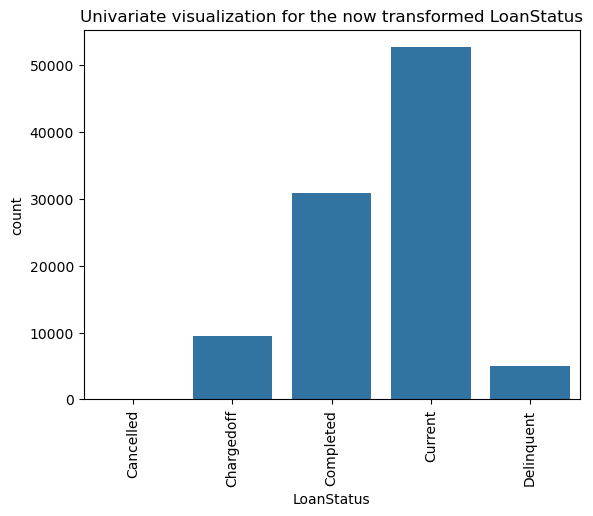

In [35]:
# Univariate visualization for the now transformed LoanStatus
plot_order = select_df['LoanStatus'].value_counts().index.sort_values()
sns.countplot(data = select_df, x = 'LoanStatus', order = plot_order, color = base_clolor )
plt.xticks(rotation = 90)
plt.title('Univariate visualization for the now transformed LoanStatus');

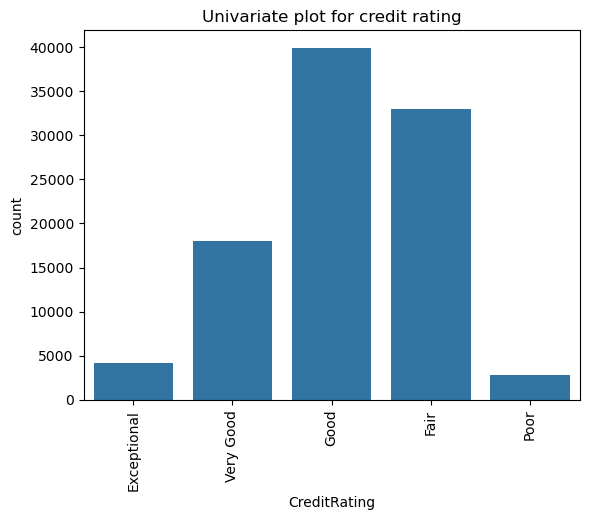

In [36]:
# Univariate plot for credit rating
plot_order = ['Exceptional','Very Good','Good','Fair','Poor']
sns.countplot(data = select_df, x = 'CreditRating', order = plot_order, color = base_clolor )
plt.xticks(rotation = 90)
plt.title('Univariate plot for credit rating');

#### OBSERVATIONS 4
> Larger proportion of the credit rating are good followed by very good

> There's an indication that the loan performance will be good

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Majority of listed loans are for borrowers with one form of employment or the other (employed, full time, part time, self employed). These employment status column was all transformed to employed. The employment status are now restricted to - employed, Not employed, Retired, and others.

> In the loan status column, the past due loans were separated by the number of days past due. The defaulted loans and the loans past due were all transformed to delinquent status. The current loans and loans whose final repayment is in progress were transformed to current status. These were done so that the loan status are restricted to - current, cancelled, charged off, and delinquent.

> Feature engineering was performed to get median score and credit ratings from the upper and lower credit scores. FICO credit rating style was applied to grade the credit scores into - poor, fair, good, very good, and exceptional ratings.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Credit scores were given in two different columns (upper and lower credit score). The medians of these scores were taken to for just one column for the analysis.

> Loan status and employment status columns were adjusted to restrict or redefine the distribution of variables. 

## Bivariate Exploration


In [37]:
select_df.sample(2)

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
52305,177615,0.24753,Employed,228.0,0.05,"$25,000-49,999",834.0,8466.0,15.0,Completed,0.08,4.0,629,Fair,Not Available
12443,1193287,0.13734,Employed,0.0,0.21,"$25,000-49,999",376.0,0.0,124.0,Current,0.00,4.0,669,Fair,Large Purchases


In [38]:
select_df.corr()

,BorrowerAPR,AmountDelinquent,DebtToIncomeRatio,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,BankcardUtilization,CurrentCreditLines,MedianScore
BorrowerAPR,1.000000,0.068852,0.058595,-0.059577,-0.361530,-0.043975,0.275235,-0.080149,-0.505440
AmountDelinquent,0.068852,1.000000,-0.019400,-0.028938,-0.019537,-0.055292,-0.025508,-0.075639,-0.067991
DebtToIncomeRatio,0.058595,-0.019400,1.000000,0.038636,0.002064,0.085119,0.035600,0.091878,-0.021215
RevolvingCreditBalance,-0.059577,-0.028938,0.038636,1.000000,0.234417,0.756197,0.243741,0.335055,0.090241
AvailableBankcardCredit,-0.361530,-0.019537,0.002064,0.234417,1.000000,0.247063,-0.357938,0.317871,0.459706
OpenRevolvingMonthlyPayment,-0.043975,-0.055292,0.085119,0.756197,0.247063,1.000000,0.292950,0.547182,0.104213
BankcardUtilization,0.275235,-0.025508,0.035600,0.243741,-0.357938,0.292950,1.000000,0.111830,-0.401831
CurrentCreditLines,-0.080149,-0.075639,0.091878,0.335055,0.317871,0.547182,0.111830,1.000000,0.147297
MedianScore,-0.505440,-0.067991,-0.021215,0.090241,0.459706,0.104213,-0.401831,0.147297,1.000000


### 

### QUESTION 1
> #### What is the relationship between borrower's annual percentage rate (APR) and credit score (Median score)?

### VISUALIZATION 1

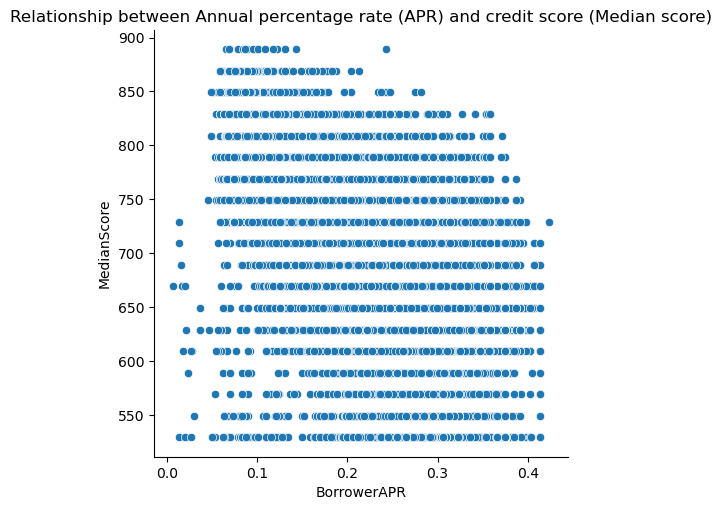

In [39]:
# Investigate relationship between Annual percentage rate (APR) and credit score (Median score)
sns.relplot(data=select_df, x='BorrowerAPR', y='MedianScore')
plt.title('Relationship between Annual percentage rate (APR) and credit score (Median score)');

### OBSERVATION 1
> The median credit score and the borrower's annualpercentage rate (APR) are negatively correlated as seen from the plot

### QUESTION 2
> #### What is the relationship between loan ststus and amount delinquent?

### VISUALIZATION 2

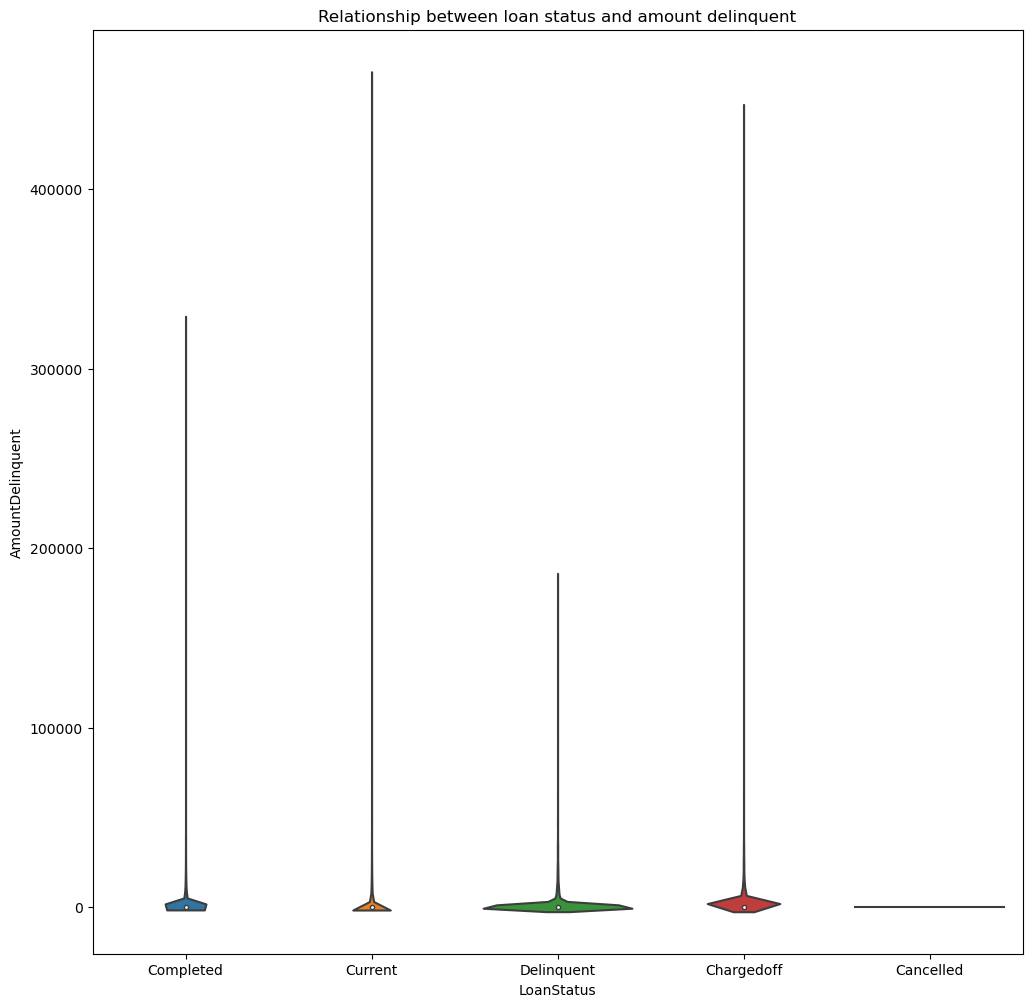

In [40]:
# Relationship between loan status and amount delinquent
plt.figure(figsize = [12, 12])
sns.violinplot(data=select_df, x='LoanStatus',y='AmountDelinquent')
plt.title('Relationship between loan status and amount delinquent');

### OBSERVATION 2
> The little amount of delinquent loans are majorly in Delinquent and charged off groups

### QUESTION 3
> #### How are income range and median credit score related?

### VISUALIZATION 3

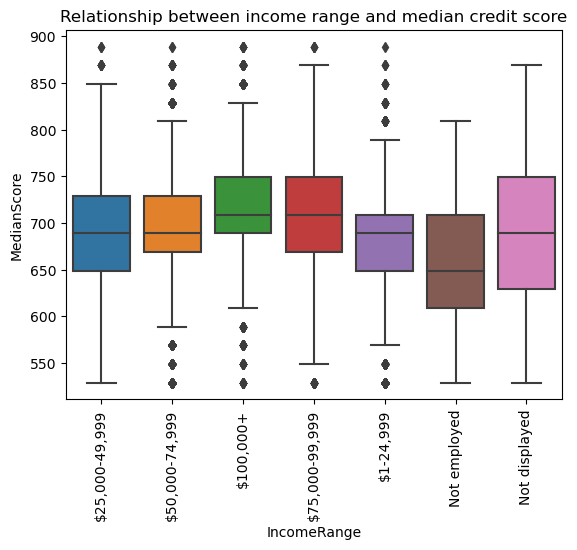

In [41]:
# Plot the relationship between income range and median credit score
sns.boxplot(data=select_df,x='IncomeRange',y='MedianScore')
plt.title('Relationship between income range and median credit score')
plt.xticks(rotation = 90);

### OBSERVATION 3
> Outliers were observed while comparing income range and median credit score

> There's a wide distribution of median credit scores in group of income range not displayed

### QUESTION 4
> #### What is the relationship between revolving credit balance and open revolving monthly payment?

### VISUALIZATION 4

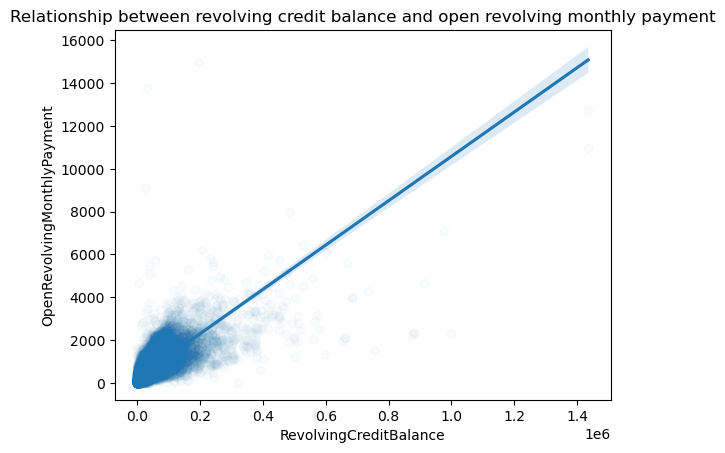

In [42]:
# Plot the relationship between revolving credit balance and open revolving monthly payment
sns.regplot(data=select_df, x='RevolvingCreditBalance',y='OpenRevolvingMonthlyPayment', 
            x_jitter=0.3,y_jitter=0.3, scatter_kws={'alpha':1/40})
plt.title('Relationship between revolving credit balance and open revolving monthly payment');

### OBSERVATION 4
> The correlation between revolving credit balance and open revolving monthly payment is strong positive

> Distribution is jampacked along the lower end of the plot


### QUESTION 5 
> #### What is the relationship between revolving credit balance and Current Credit Lines?

### VISUALIZATION 5

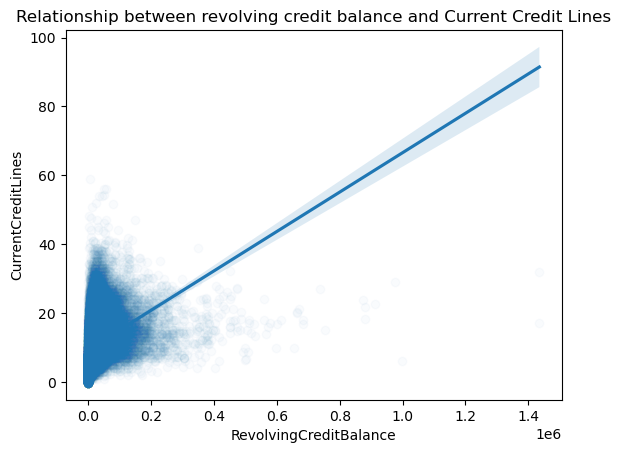

In [43]:
# Plot the relationship between revolving credit balance and Current Credit Lines
sns.regplot(data=select_df, x='RevolvingCreditBalance',y='CurrentCreditLines',
            x_jitter=0.3,y_jitter=0.3, scatter_kws={'alpha':1/40})
plt.title('Relationship between revolving credit balance and Current Credit Lines');

### OBSERVATION 5
> The correlation between revolving credit balance and open revolving monthly payment is positive

> Distribution is jampacked along the lower end of the plot


### QUESTION 6

> #### How does the Available Bankcard Credit and Bank card Utilization relate to each other?

### VISUALIZATION 6

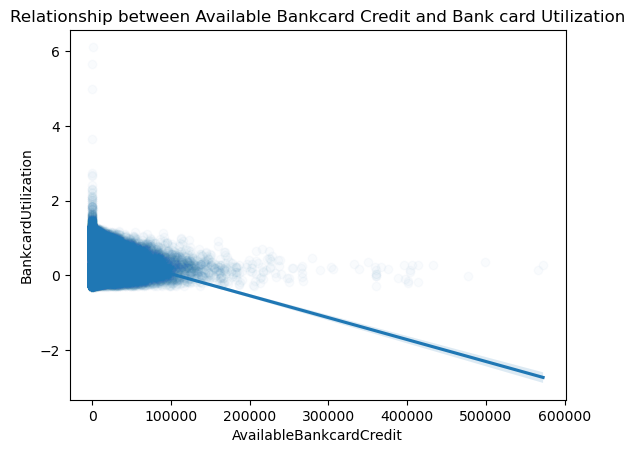

In [44]:
# Plot the relationship between Available Bankcard Credit and Bank card Utilization
sns.regplot(data=select_df, x='AvailableBankcardCredit',y='BankcardUtilization', 
            x_jitter=0.3,y_jitter=0.3, scatter_kws={'alpha':1/40})
plt.title('Relationship between Available Bankcard Credit and Bank card Utilization');

### OBSERVATION 6

> The plot shows that correlation is negative

> There's a concentration of points at the lower end of the plot

### QUESTION 7
> #### How are employment status and credit ratings compared?

### VISUALIZATION 7

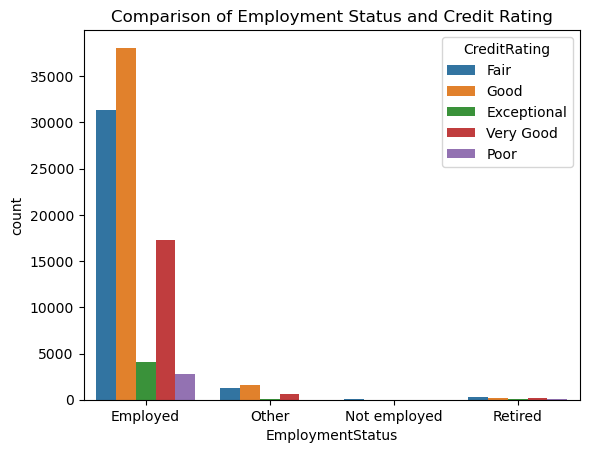

In [45]:
# compare two qualitative variables (EmploymentStatus and CreditRating) clustered bar chart
sns.countplot(data=select_df, x='EmploymentStatus',hue='CreditRating')
plt.title('Comparison of Employment Status and Credit Rating');

### OBSERVATION 7
> The employed category of borrowers have the highest credit ratings

> The highest credit rating is 'Good'

### QUESTION 8 
> #### How does Listing Category compare with Employment Status?

### VISUALIZATION 8

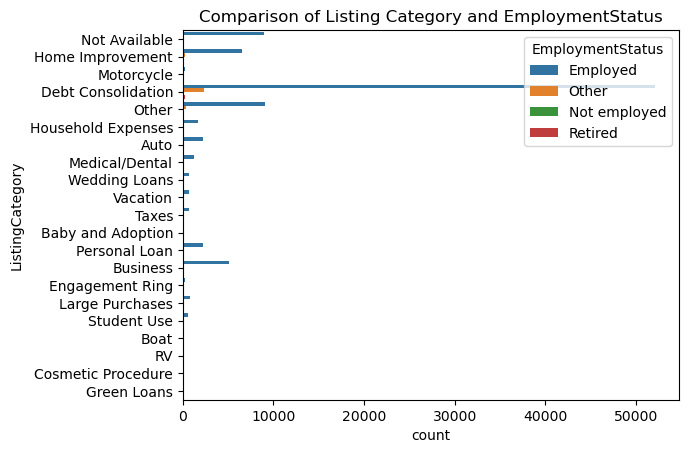

In [46]:
# compare two qualitative variables (ListingCategory and EmploymentStatus) clustered bar plot
sns.countplot(data=select_df, y='ListingCategory',hue='EmploymentStatus')
plt.title('Comparison of Listing Category and EmploymentStatus');


### OBSERVATION 8

> Majority of the employed borrowers have their debts consolidated

### QUESTION 9
> #### How does delinquent amounts spread accross listing categories?

### VISUALIZATIONS 9

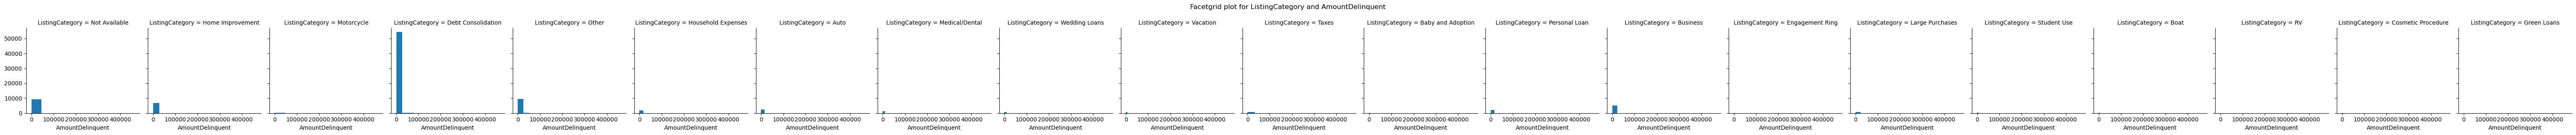

In [47]:
# checking for listing category and delinquent amount 
x= sns.FacetGrid(data=select_df, col='ListingCategory');
x.map(plt.hist, 'AmountDelinquent')
x.fig.suptitle('Facetgrid plot for ListingCategory and AmountDelinquent', y=1.08);

### OBSERVATION 9

> The delinquent amounts are majorly concentarated in debt consolidation listing category

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Having done some inexhaustive bivariate explorations on the chosen dataset, some sriking relationships were observed;

>> The delinquent amounts are majorly concentarated in debt consolidation listing category

>> Majority of the employed borrowers borrowed to consolidate previous debts making the general credit performance look good

>> The 'Good' rating according to FICO SCORE is the majority and the employed category of borrowers have it.

>> The little amount of delinquent loans are majorly in Delinquent and charged off groups of the wrngled loan status

>> There's a wide distribution of median credit scores in group of income range that were not displayed


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes! Majority of the employed borrowers have their debts consolidated

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [48]:
select_df.sample(2)

,ListingNumber,BorrowerAPR,EmploymentStatus,AmountDelinquent,DebtToIncomeRatio,IncomeRange,RevolvingCreditBalance,AvailableBankcardCredit,OpenRevolvingMonthlyPayment,LoanStatus,BankcardUtilization,CurrentCreditLines,MedianScore,CreditRating,ListingCategory
2058,707876,0.15324,Employed,0.0,0.35,"$50,000-74,999",36718.0,11052.0,877.0,Current,0.76,17.0,749,Very Good,Auto
106529,958293,0.15833,Employed,0.0,0.40,"$25,000-49,999",26761.0,9443.0,605.0,Current,0.70,19.0,709,Good,Home Improvement


In [49]:
num_variables = ['BorrowerAPR','BankcardUtilization','MedianScore','AmountDelinquent','DebtToIncomeRatio',
             'RevolvingCreditBalance','BankcardUtilization','OpenRevolvingMonthlyPayment','CurrentCreditLines']

cat_variables = ['EmploymentStatus','IncomeRange','LoanStatus','CreditRating','ListingCategory']

### QUESTION 1
> #### Show the visualization to investigate correlation between numerical variables

### VISUALIZATION 1

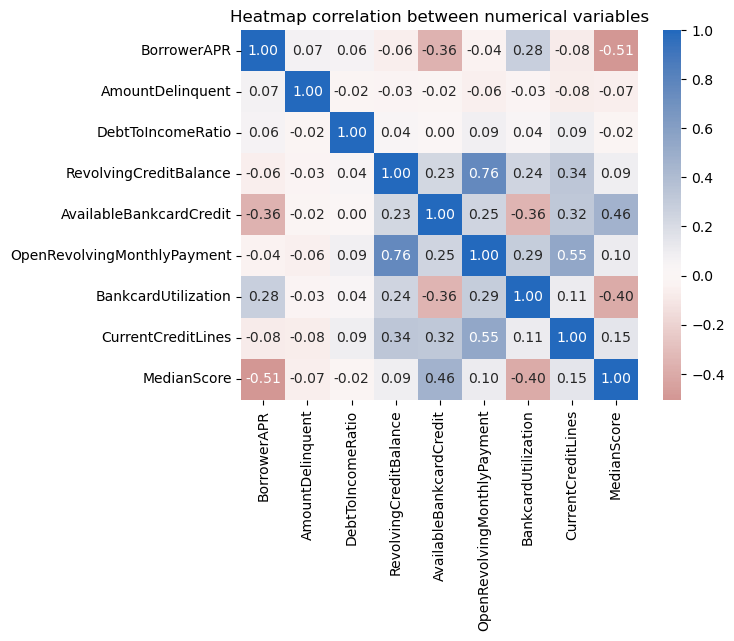

In [50]:
# Investigation visually the correlation of numerical variables with heatmap
sns.heatmap(select_df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Heatmap correlation between numerical variables');

### OBSERVATION 1
> Amount delinquent has weak negative correlation with other numerical variable except Borrower APR wchich it has weak positive correlation with.

> The correlation between revolving credit balance and open revolving monthly repayment is strong positive.

> There stands to be no correlation at all between debt to income ratio and available bank credit card.

> median credit score and borrower APR are strongly negatively correlated

> Availabile bank credit card seems to be mostly positively correlated with median credit score. 

### QUESTION 2
> #### What is Relationship between CreditRating, ListingCategory, LoanStatus like?

### VISUALIZATION

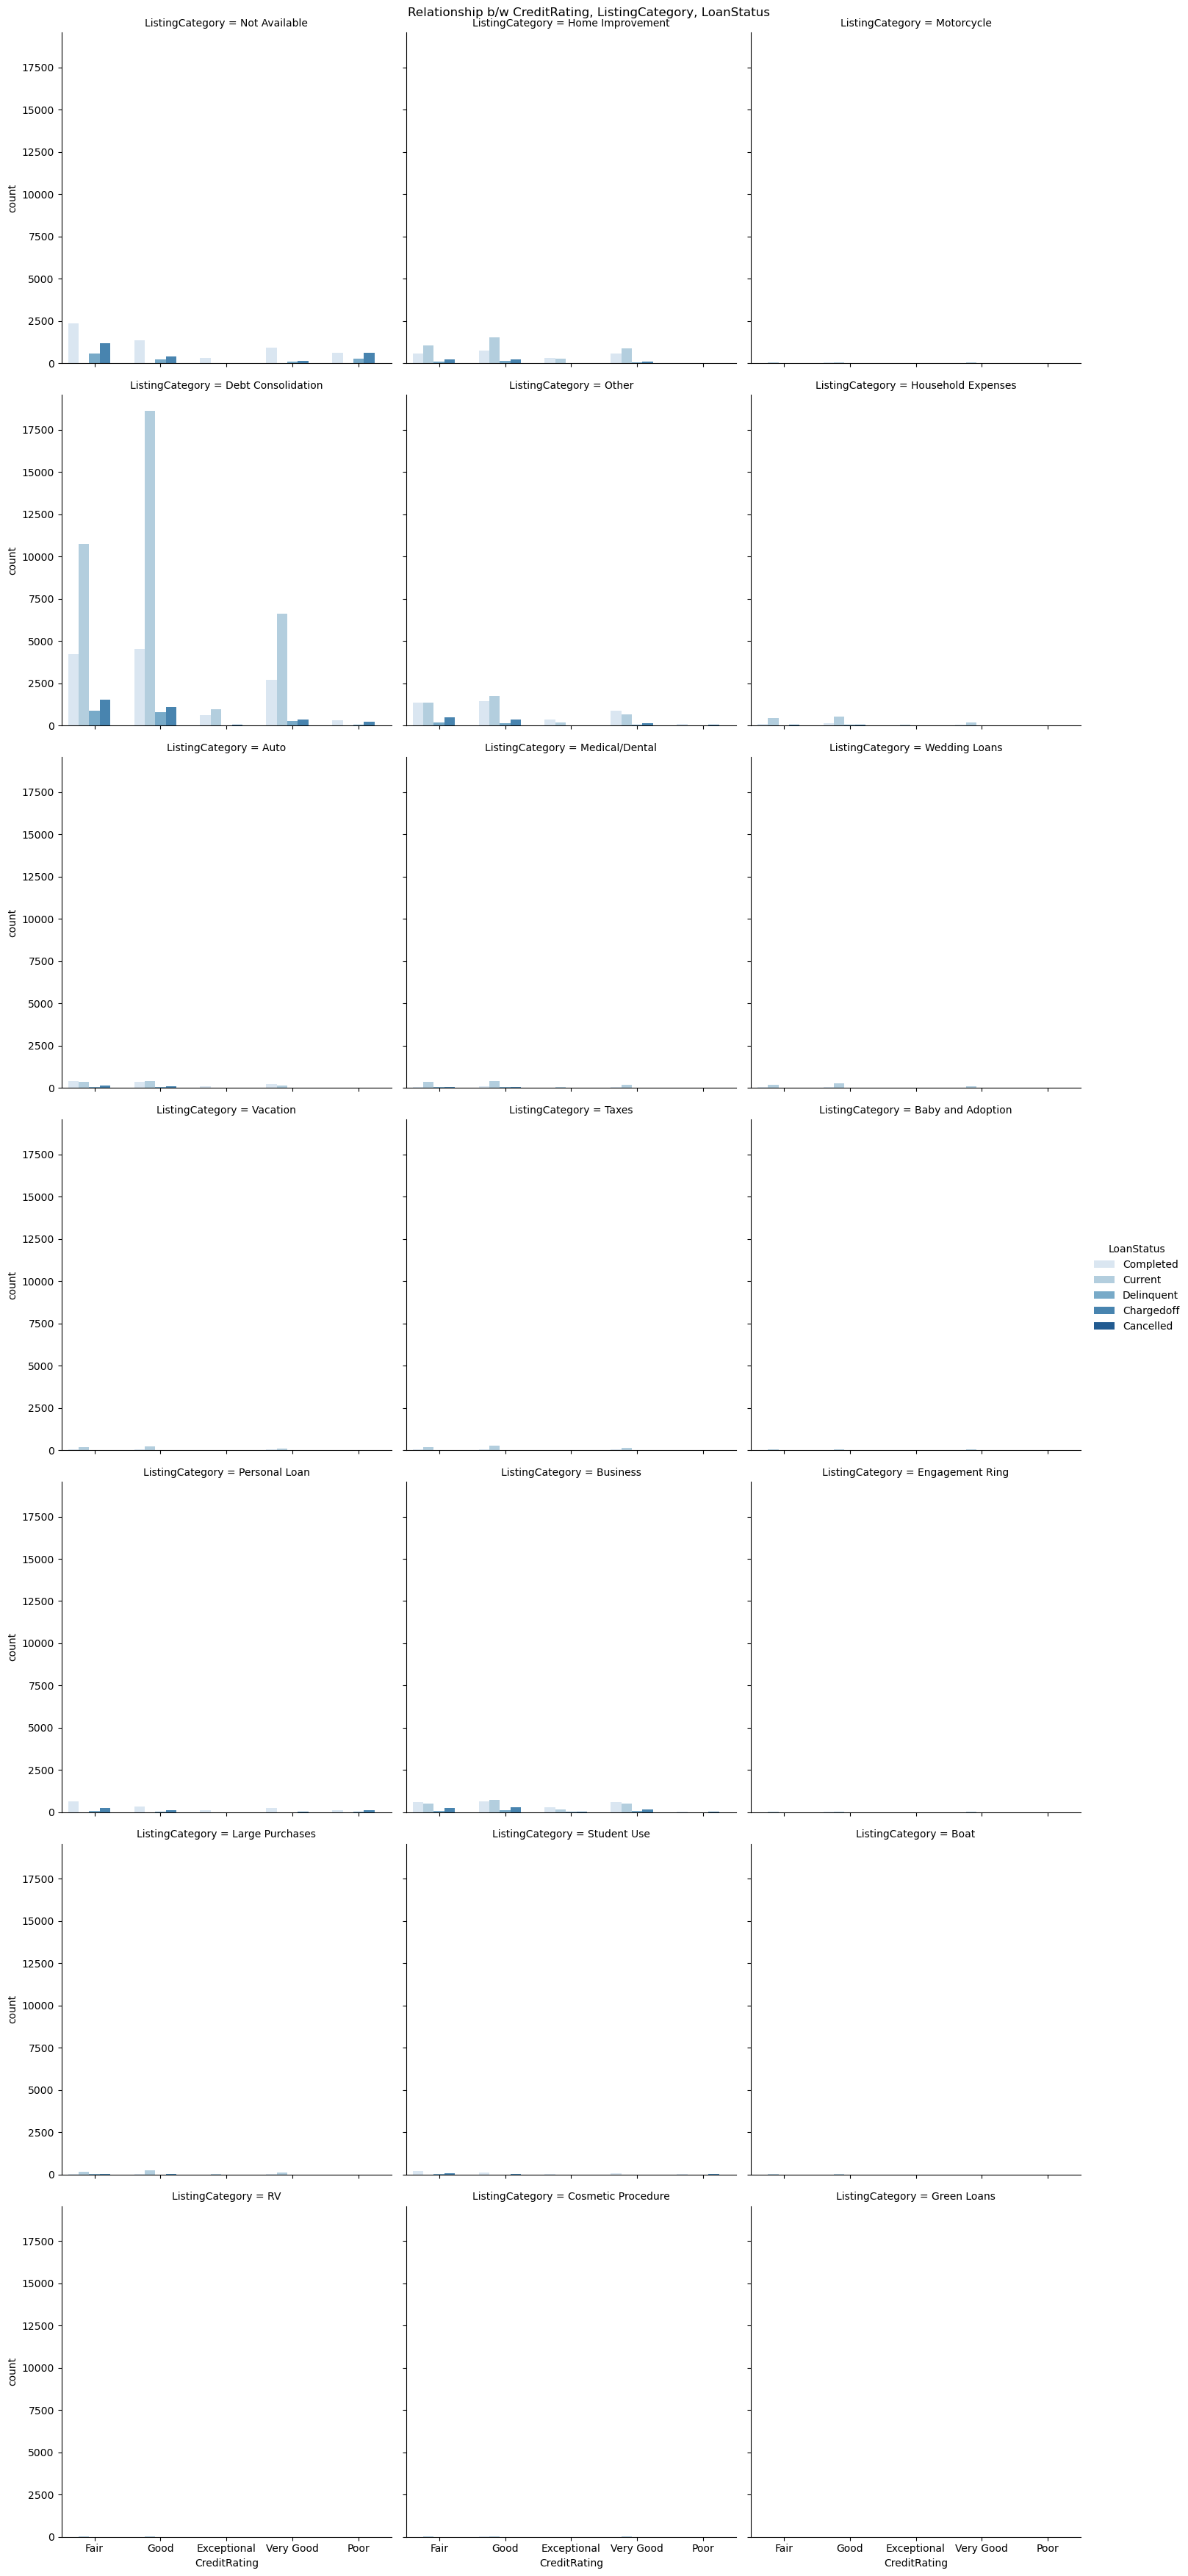

In [51]:
# What is Relationship between CreditRating, ListingCategory, LoanStatus like
p = sns.catplot(data = select_df,x = 'CreditRating', hue = 'LoanStatus', col = 'ListingCategory',
            kind = 'count', palette = 'Blues', col_wrap = 3)
p.fig.suptitle('Relationship b/w CreditRating, ListingCategory, LoanStatus', y=1.0);

### OBSERVATION 2
> It is confirmed that majority of the credits currently running are for debt consolidation

> A significant count of the credit items are charged off

### QUESTIONS 3 
>#### What relationships can seen from comparing ListingCategory, LoanStatus, BorrowerAPR, and AmountDelinquent?

### VISUALIZATION 3

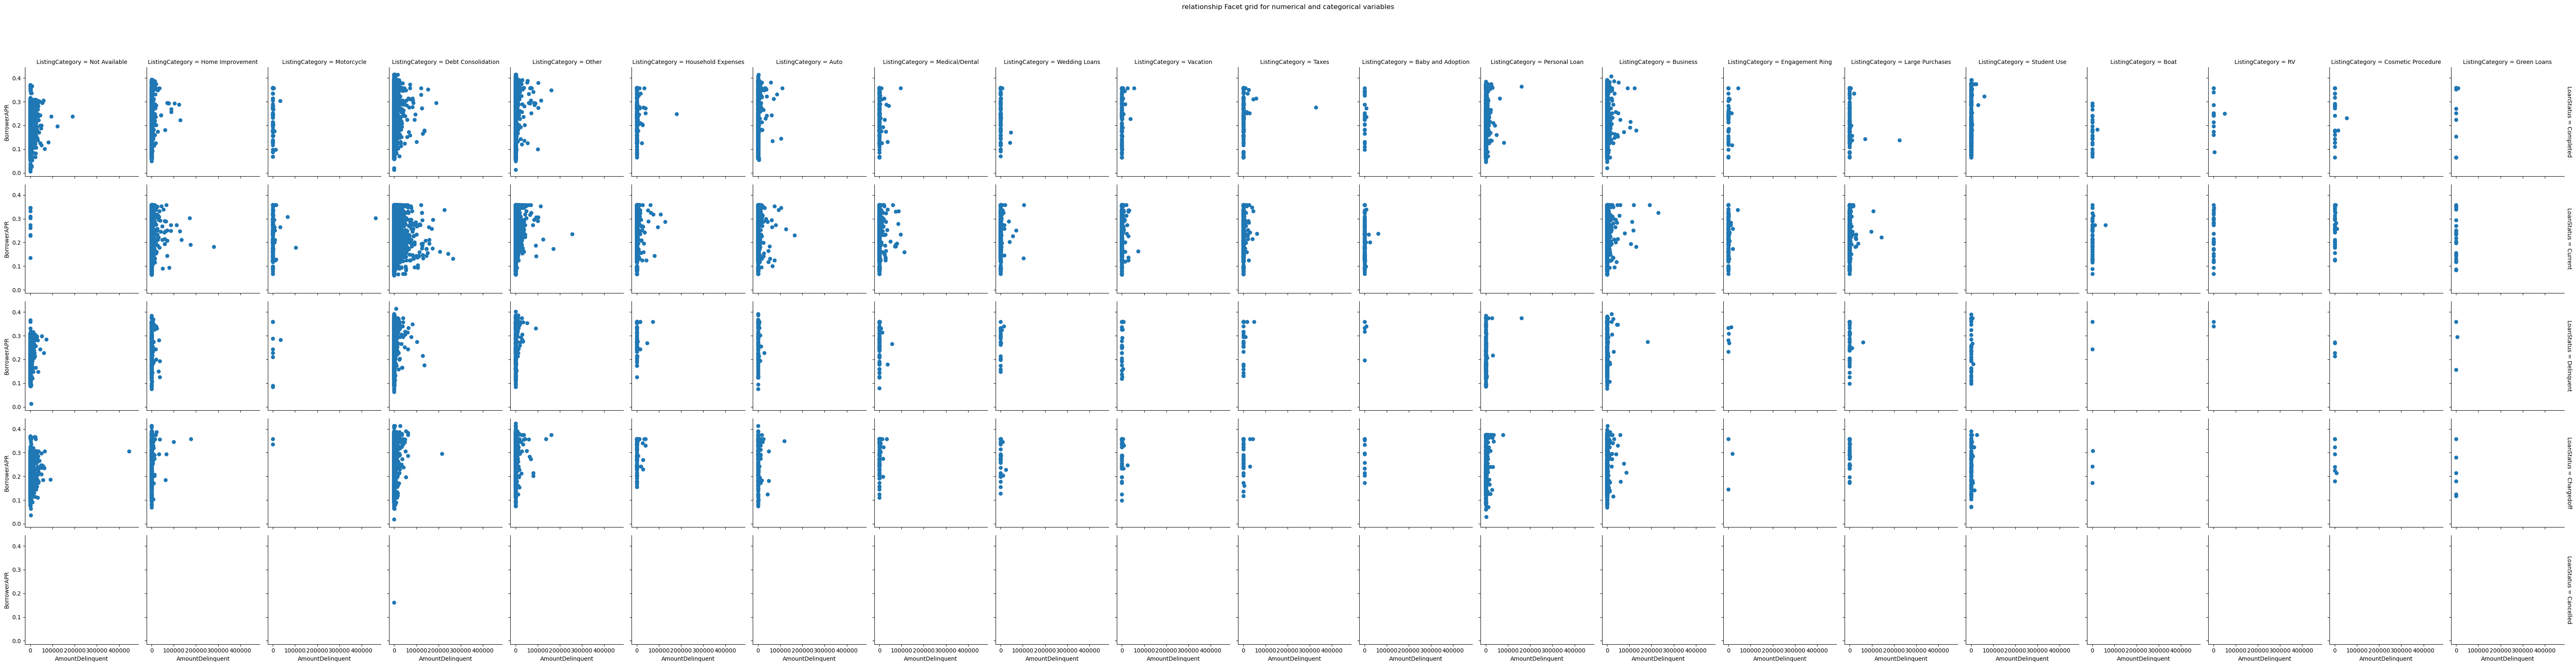

In [52]:
# comparing ListingCategory, LoanStatus, BorrowerAPR, and AmountDelinquent
x = sns.FacetGrid(data = select_df, col = 'ListingCategory', row = 'LoanStatus',
                margin_titles = True)
x.map(plt.scatter, 'AmountDelinquent', 'BorrowerAPR')
x.fig.suptitle('relationship Facet grid for numerical and categorical variables', y=1.08);


### OBSERVATION 3
> The very weak positive correlation between borrower APR and amount delinquent variables, is more pronounced on debt consolidation and others listing category with loan status as completed, current, delinquent, and charged off in that order.

### QUESTION 4
> #### How are numerical varriables related using scatter plot with histogram?

### VISUALIZATION 4

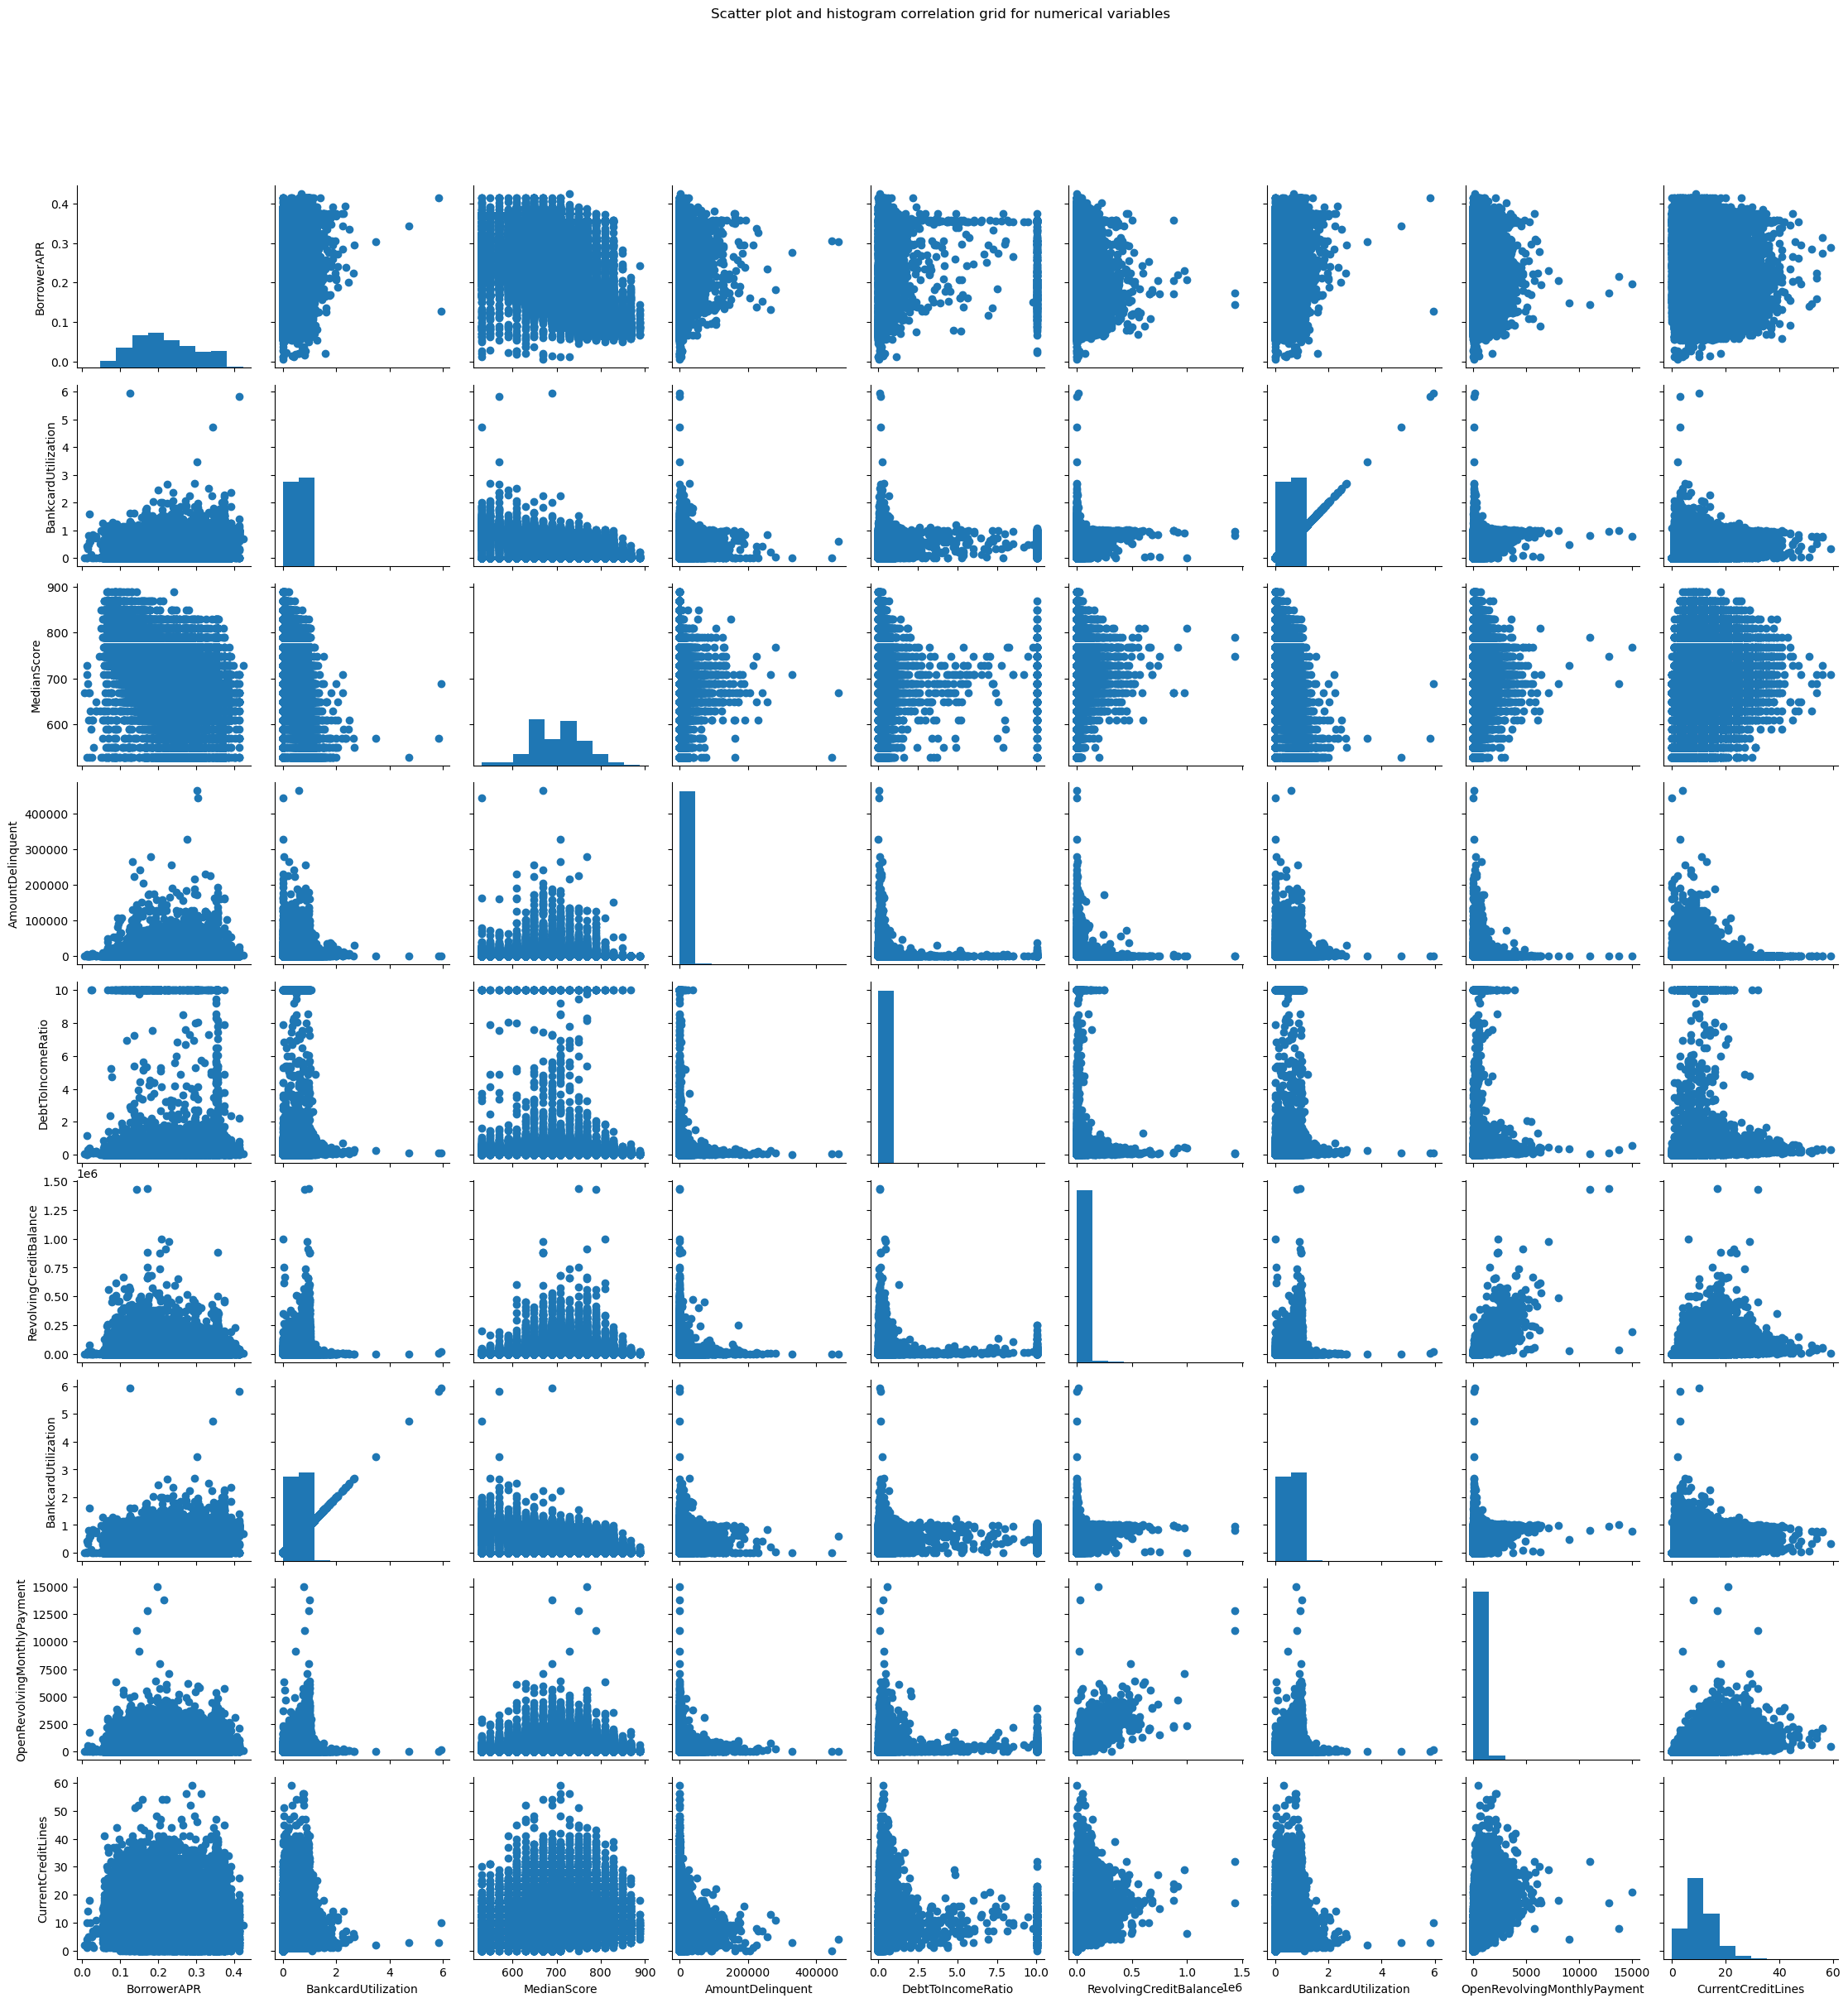

In [53]:
# plot the relationship bwtween numerical variables
g = sns.PairGrid(data = select_df, vars = num_variables)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.fig.suptitle('Scatter plot and histogram correlation grid for numerical variables', y=1.08);

### OBSERVATION 4
> Amount delinquent has weak negative correlation with other numerical variable except Borrower APR wchich it has weak positive correlation with.

> The correlation between revolving credit balance and open revolving monthly repayment is strong positive.

> There stands to be no correlation at all between debt to income ratio and available bank credit card.

> median credit score and borrower APR are strongly negatively correlated

> Availabile bank credit card seems to be mostly positively correlated with median credit score. 

### QUESTION 5
> #### What are the relationships between categorical variables and numerical variables like?

### VISUALIZATION 5

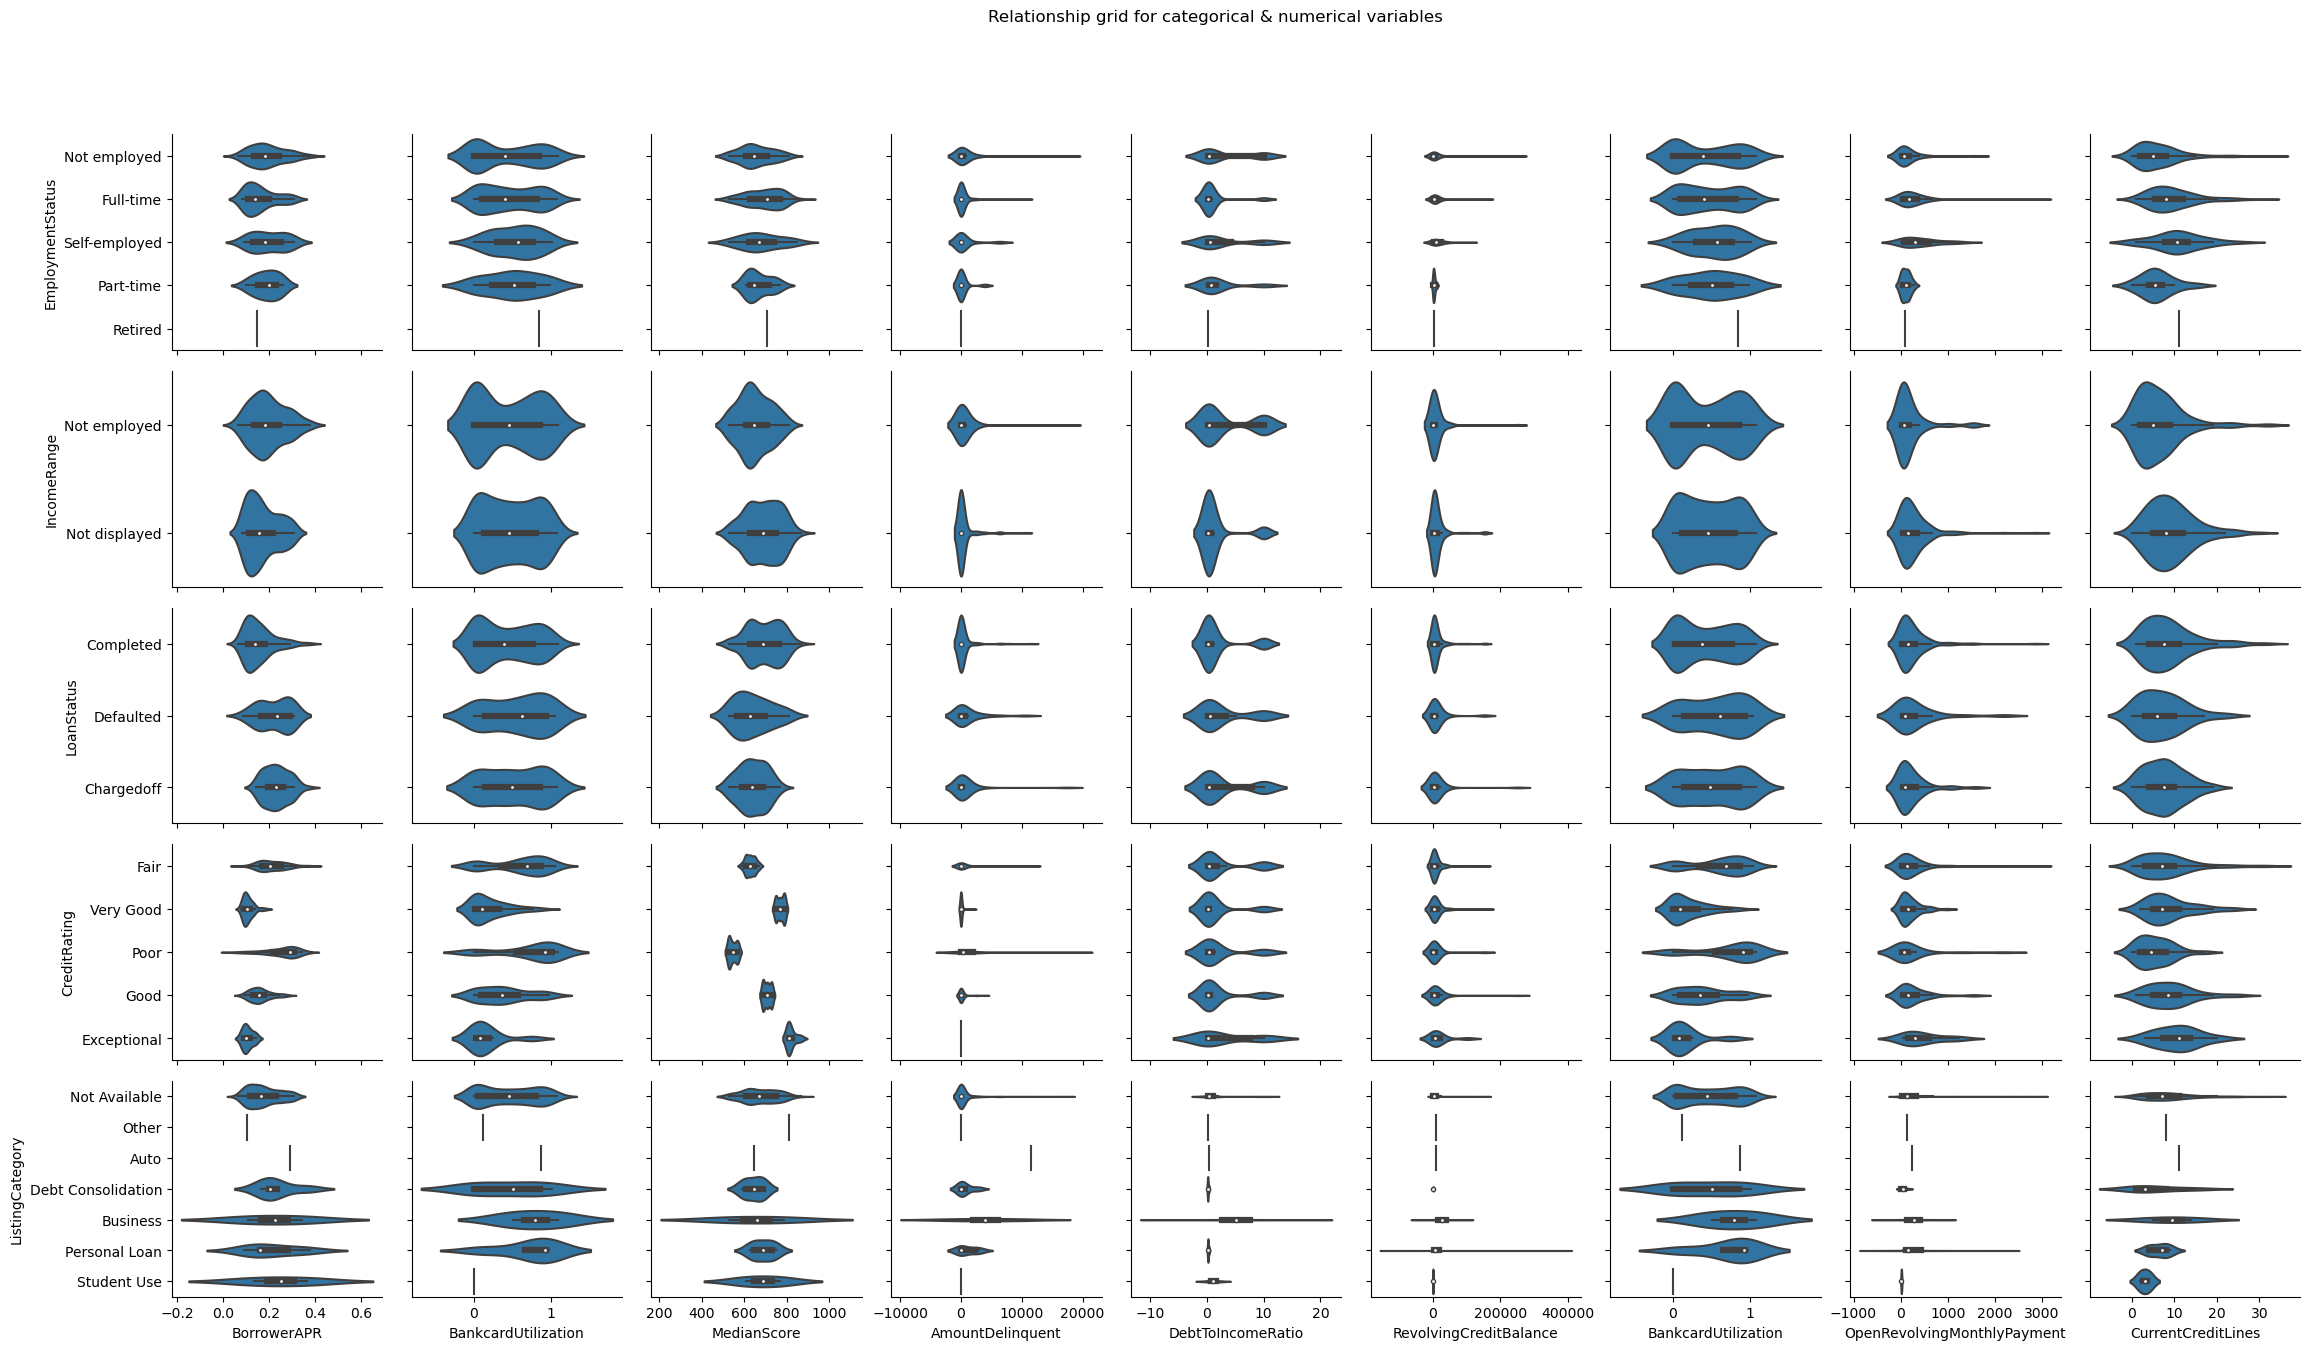

In [54]:
# Comparing categorical and numerical variables in various facets
t = sns.PairGrid(data = df, x_vars = num_variables,
                y_vars = cat_variables)
t.map(sns.violinplot, color=base_clolor)
t.fig.suptitle('Relationship grid for categorical & numerical variables', y=1.08);

### OBSERVATION 5
> More examination is needed for proper communication of visualization 5 as some variables seems to be missing

### QUESTION 6
> #### How are RevolvingCreditBalance, OpenRevolvingMonthlyPayment, and AmountDelinquent compared?

### VIAUALIZATION 6

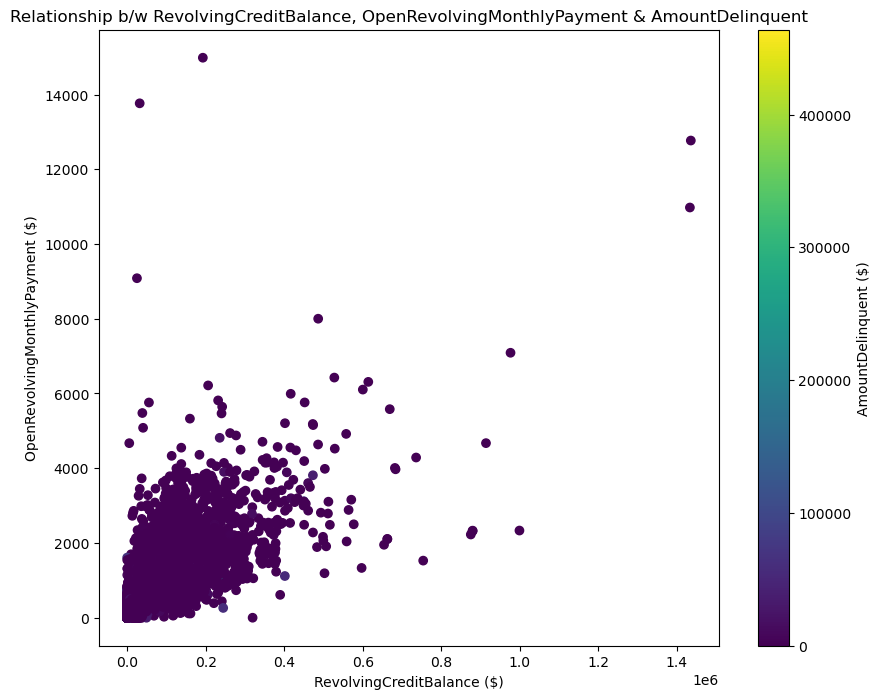

In [55]:
# Compare RevolvingCreditBalance, OpenRevolvingMonthlyPayment, and AmountDelinquent
plt.figure(figsize = [10,8])
plt.scatter(data = select_df, x = 'RevolvingCreditBalance', y = 'OpenRevolvingMonthlyPayment',
                c = 'AmountDelinquent')
plt.colorbar(label = 'AmountDelinquent ($)')
#plt.xlim(0,160)  #plt.ylim(15,160)
plt.xlabel('RevolvingCreditBalance ($)')
plt.ylabel('OpenRevolvingMonthlyPayment ($)')
plt.title('Relationship b/w RevolvingCreditBalance, OpenRevolvingMonthlyPayment & AmountDelinquent');


### OBSERVATION 6
> RevolvingCreditBalance and OpenRevolvingMonthlyPayment have a very strong positive correlation

> Amounts Delinquent are more concetrated in the lower range, say 0 to 100,000 and sparsely distributed as we go up the legend

### QUESTION 7
> #### Compare LoanStatus, AmountDelinquent, and EmploymentStatus

### VISUALIZATION 7

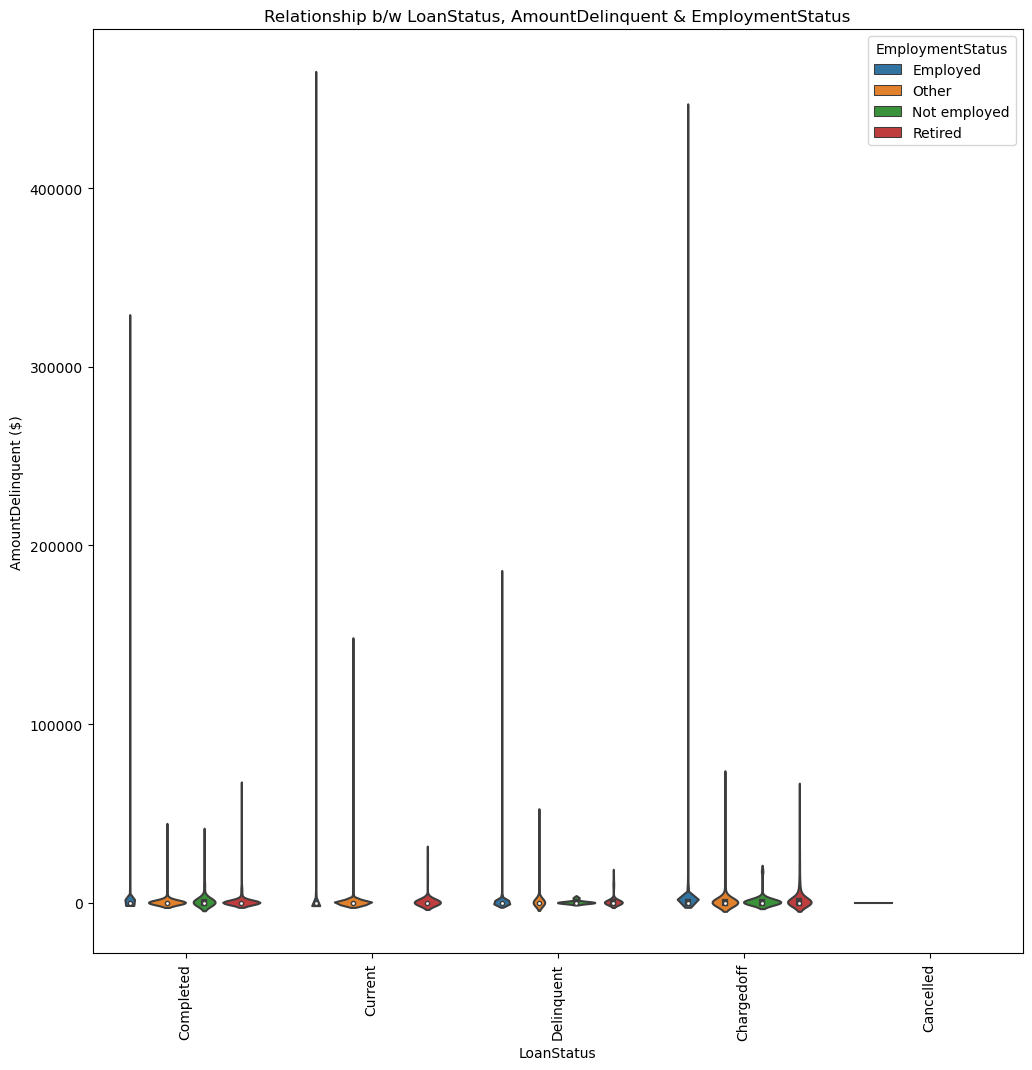

In [56]:
# Compare LoanStatus, AmountDelinquent, and EmploymentStatus
plt.figure(figsize = [12, 12])
sns.violinplot(data=select_df, x='LoanStatus', y='AmountDelinquent', hue='EmploymentStatus')
plt.xlabel('LoanStatus')
plt.ylabel('AmountDelinquent ($)')
plt.xticks(rotation = 90)
plt.title('Relationship b/w LoanStatus, AmountDelinquent & EmploymentStatus');

### OBSERVATION 8
> The amount delinquent accross all employment status have majorly charged off and completed loan status in that order

> The credit amount delinquent with current loan status are concentrated on others and retired employment status

> The amount delinquent with Cancelled and Delinquent loan status are very insignificant

### QUESTION 9
> ####  Compare CreditRating, DebtToIncomeRatio, and IncomeRange variables

### VISUALIZATION 9

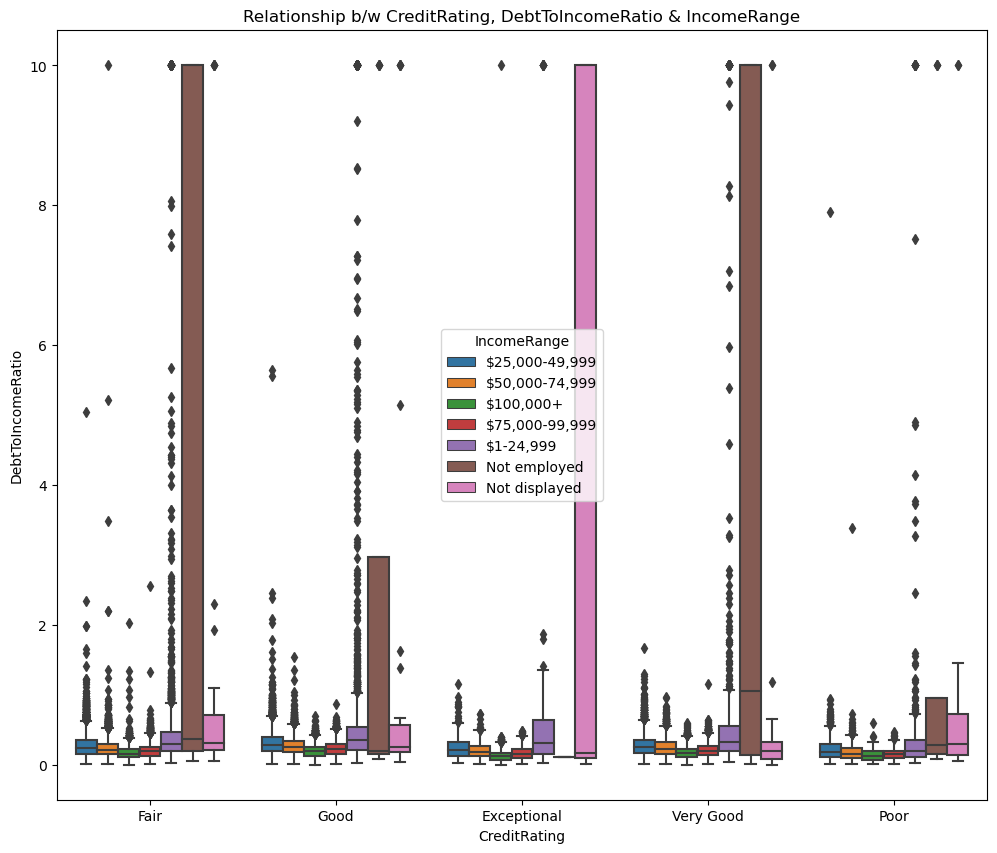

In [57]:
# Compare CreditRating, DebtToIncomeRatio, and IncomeRange variables
plt.figure(figsize = [12, 10])
sns.boxplot(data=select_df, x='CreditRating', y='DebtToIncomeRatio', hue='IncomeRange')
plt.title('Relationship b/w CreditRating, DebtToIncomeRatio & IncomeRange');

### OBSERVATION 9
> Too many outliers exist in the plot

> The income ranges improperly documented as 'Not employed' and 'Not displayed' have a very significant effect on this analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The income ranges improperly documented as 'Not employed' and 'Not displayed' have a very significant effect on this analysis.

> The amount delinquent accross all employment status have majorly charged off and completed loan status in that order. The credit amount delinquent with current loan status are concentrated on others and retired employment status. The amount delinquent with Cancelled and Delinquent loan status are very insignificant.

> Amounts Delinquent are more concetrated in the lower ranges of the credit, compared to the whole dataset, the delinquncy is not significant as most of the debts have been consolidated, completed or charged off.

### Were there any interesting or surprising interactions between features?

> Yes! There are interesting interaction between features for e.g;

>> Borrower APR is the only variable that slightly positively influence amounts delinquent

>> The income ranges improperly documented as 'Not employed' and 'Not displayed' have a very significant effect on this analysis and these needs to be resolved.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> 113,937 rows and 81 columns of prosper loan dataset was worked on, data wrangling and feature engineering reduced the dataset to the shape (96187, 16) and  exploration was done on the resultant dataset.

> Univariate explorations were carried out to investigate how distrubuted the resultant loan listing dataset is accross, IncomeRange, EmploymentStatus, LoanStatus, and CreditRating. The behaviour of the dataset was established and feature engineering was done on some variables, loan status, employment status, upper and lower credit scores and credit ratings to prepare data for visual analysis.

> Bivariate explorations were done to examine the relationship between pairs of variables in the dataset and some interesting relationships between variable pairs were noticed and used for analysis.

> Multivariate explorations were done to nvestigate the relationship between more than two variable. These exploratons gave more insightful comfirmation and check of the relationships and distributions noticed in the bivariate and univariate explorations respectively.

### RESULT
> In all these analytical visual explorations, attempts were made to investigate the the performance of the listed credits. In all the explorations, the following were found:

>> 1. The performance of the listed credit were generally good.

>> 2. Majority of borrowers in previous debts borrowed for loan consolidation.

>> 3. Improper or incomplete documentation, especially in the borrowers income ranges did not allow for exhaustive analysis

>> 4. The correlation between numeric variables and amounts amount delinquent variables are generally weakly negative except for BorrowerAPR which positively influenced delinquency.

### RECOMMENDATION
> A more exhaustive research and analysis is recommended to get a more exhaustive and cnclusive result.

### DISCLAIMER

> The results gotten from this project does not in any way imply an ehaustive conclusion. All the explorations done here are open and recommended for more indept review and research in order to reach probably better conclusions and results. This project is strictly for the purpose of ALX data analysis project.




